In [9]:
import sys
import os
sys.path.append(os.path.abspath(os.path.dirname(os.getcwd())))

from src import utils
from src import aperture_photometry_utils as ap_utils


In [10]:
import numpy as np
array = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9], [1, 2, 3]])
print(array)

[[1 2 3]
 [4 5 6]
 [7 8 9]
 [1 2 3]]


In [11]:
print(utils.subarray_2D(array, 0, 0, 3))

[[0 0 0]
 [0 1 2]
 [0 4 5]]


In [12]:
print(utils.subarray_2D(array, 1, 1, 5))

[[0 0 0 0 0]
 [0 1 2 3 0]
 [0 4 5 6 0]
 [0 7 8 9 0]
 [0 1 2 3 0]]


In [13]:
import matplotlib.pyplot as plt

Found star at: 140, 120


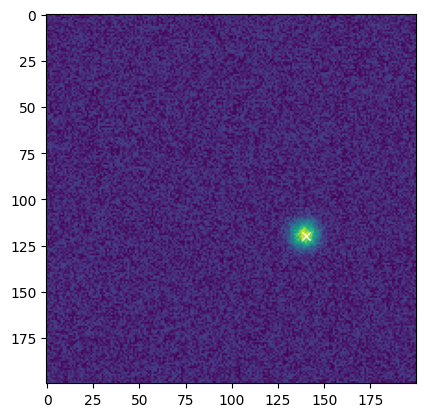

In [33]:
x = np.linspace(0, 200, 200)
y = np.linspace(0, 200, 200)
x, y = np.meshgrid(x, y)
initial_values = [4, 140, 120, 5, 0]
z = utils.gaussian_2D((x, y), *initial_values).reshape(len(x), len(y))
z = z + np.random.rand(*z.shape) 
plt.imshow(z)
star_x, star_y = ap_utils.fit_star_position(z, (x,y))
plt.plot([star_x], [star_y], marker='x', color='white')

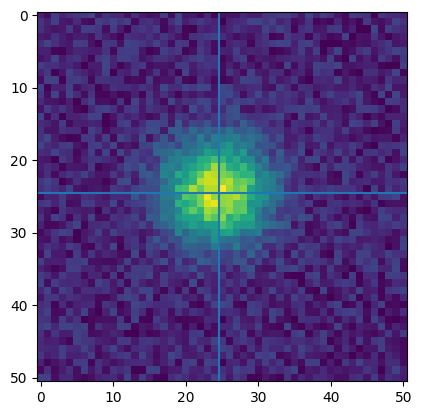

In [34]:
width = 51
cropped = utils.subarray_2D(z, star_x, star_y, width)
plt.imshow(cropped)
plt.axhline(width//2-0.5)
plt.axvline(width//2-0.5)